<a href="https://colab.research.google.com/github/dani-lbnl/mudit/blob/main/Topic_Modeling_Top2Vec_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Installation

In [6]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

     |████████████████████████████████| 34.5 MB 12 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.51.2 requires llvmlite<0.35,>=0.34.0.dev0, but you have llvmlite 0.38.0 which is incompatible.
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-305d6yn3/hdbscan_f0ac16c849a24afca28afe31bbf97ca5
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-305d6yn3/hdbscan_f0ac16c849a24afca28afe31bbf97ca5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330752 

In [7]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

## Top2Vec on pubs.xlsx

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_table('/content/drive/MyDrive/LBNL/Pubs.xls')
abstracts = list(df[~df['Abstract'].isna()]['Abstract'])

# corpus_abs, id2word_abs, words_abs = preprocess_lda(abstracts)

In [3]:
# for title
indices = df['Title'].isna()
df.loc[indices,'Title'] = ""

# for abstract
indices = df['Abstract'].isna()
df.loc[indices,'Abstract'] = ""

# combined - title + abstract
df['Combined'] = df['Title'] + " " + df['Abstract']
combined = list(df['Combined'])

In [8]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_reviews = Top2Vec(documents=combined, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-03-18 19:06:03,319 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-18 19:06:04,340 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-03-18 19:06:38,279 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-18 19:06:41,963 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

Total time taken (mins):  0


In [9]:
# show the total number of topics
model_reviews.get_num_topics() 

3

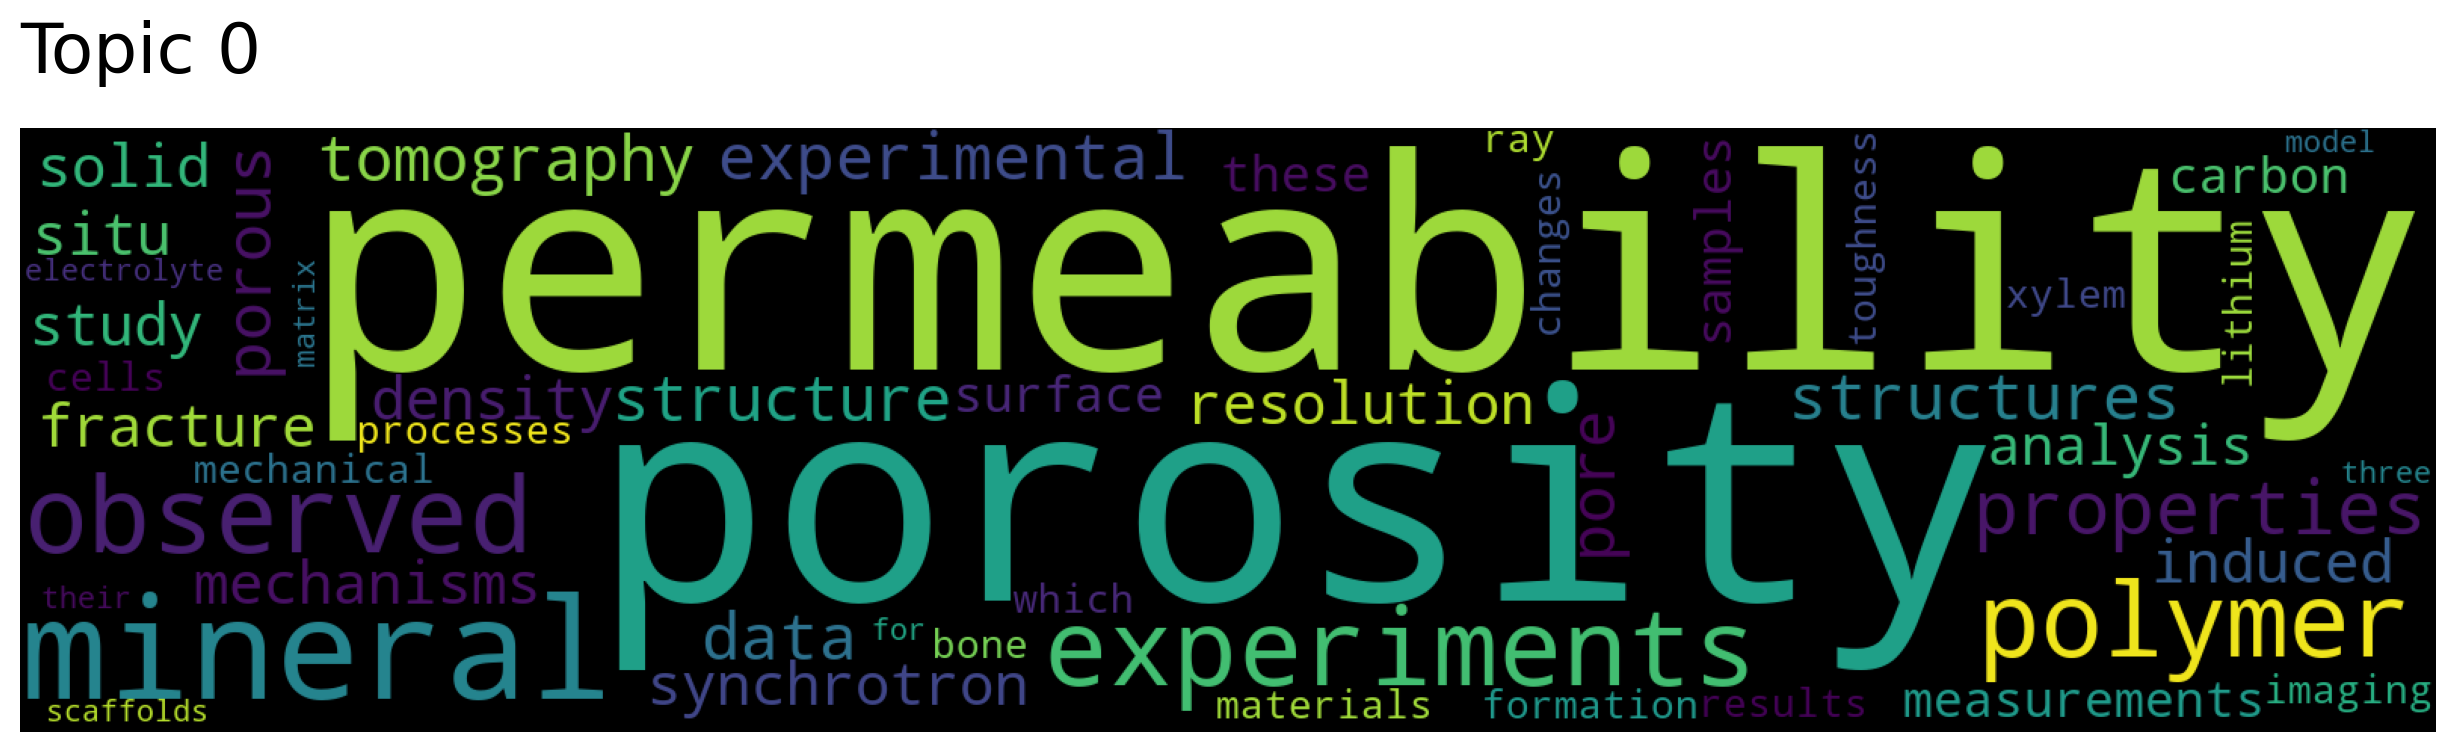

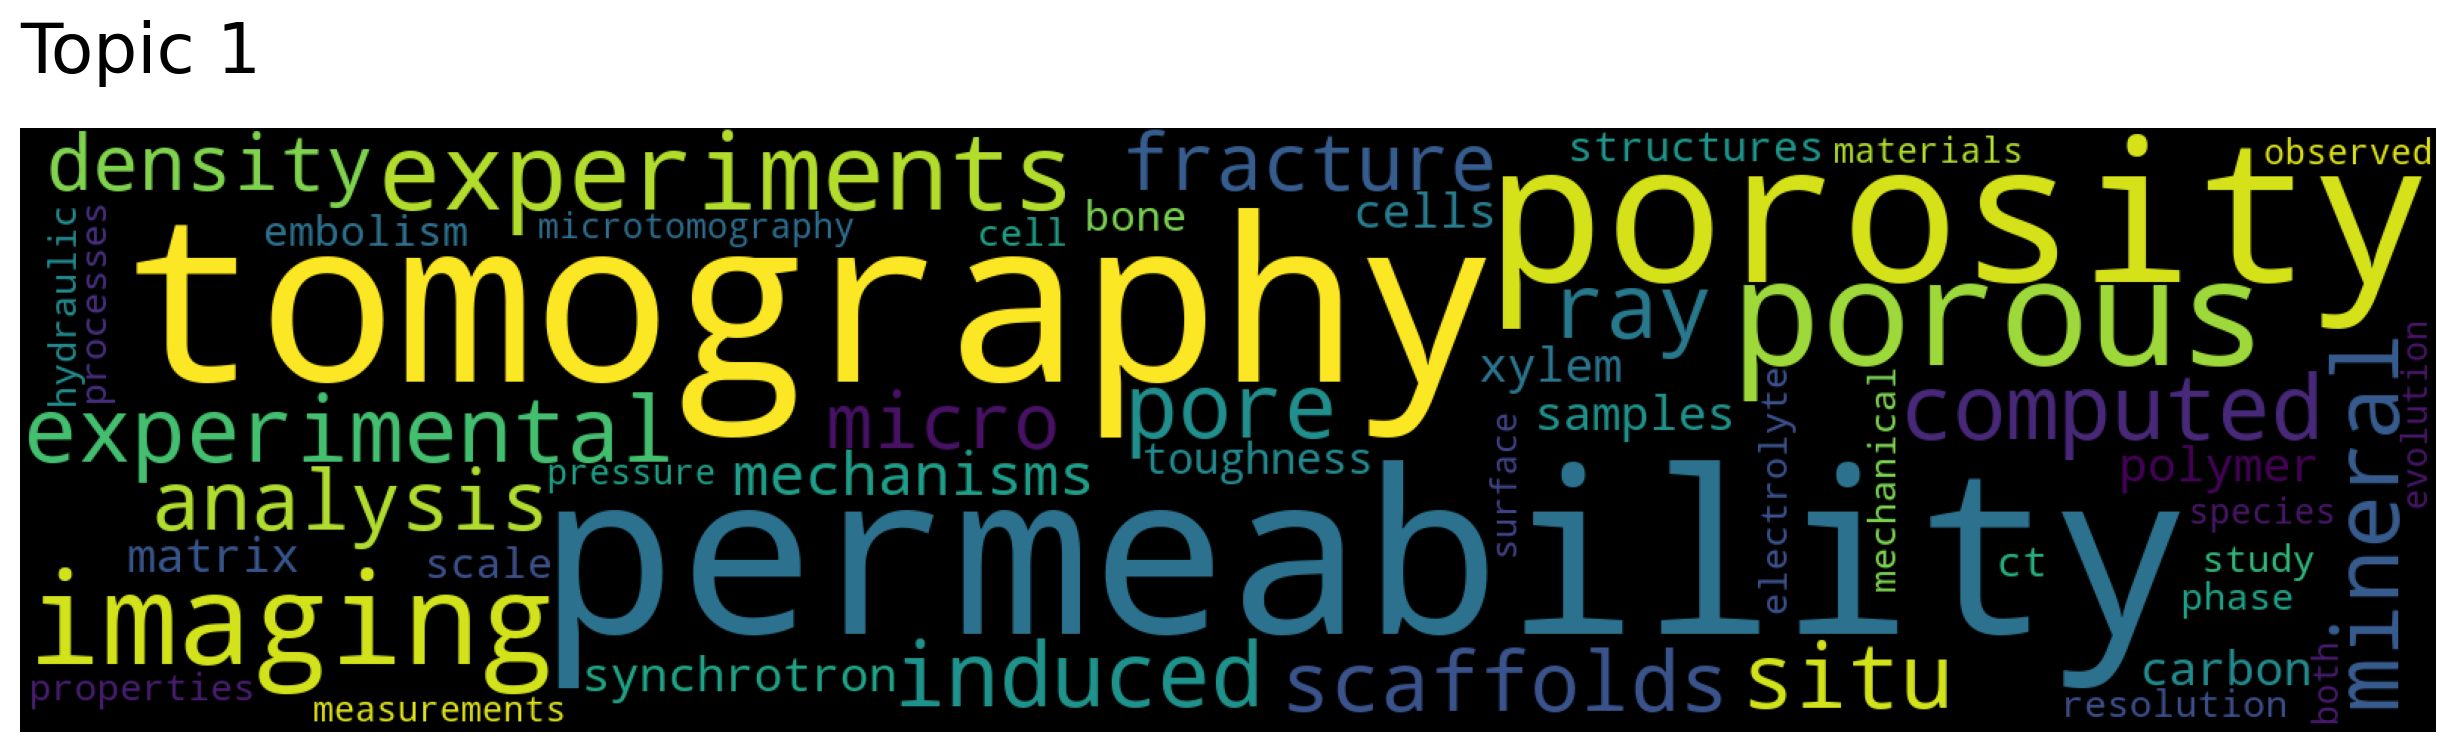

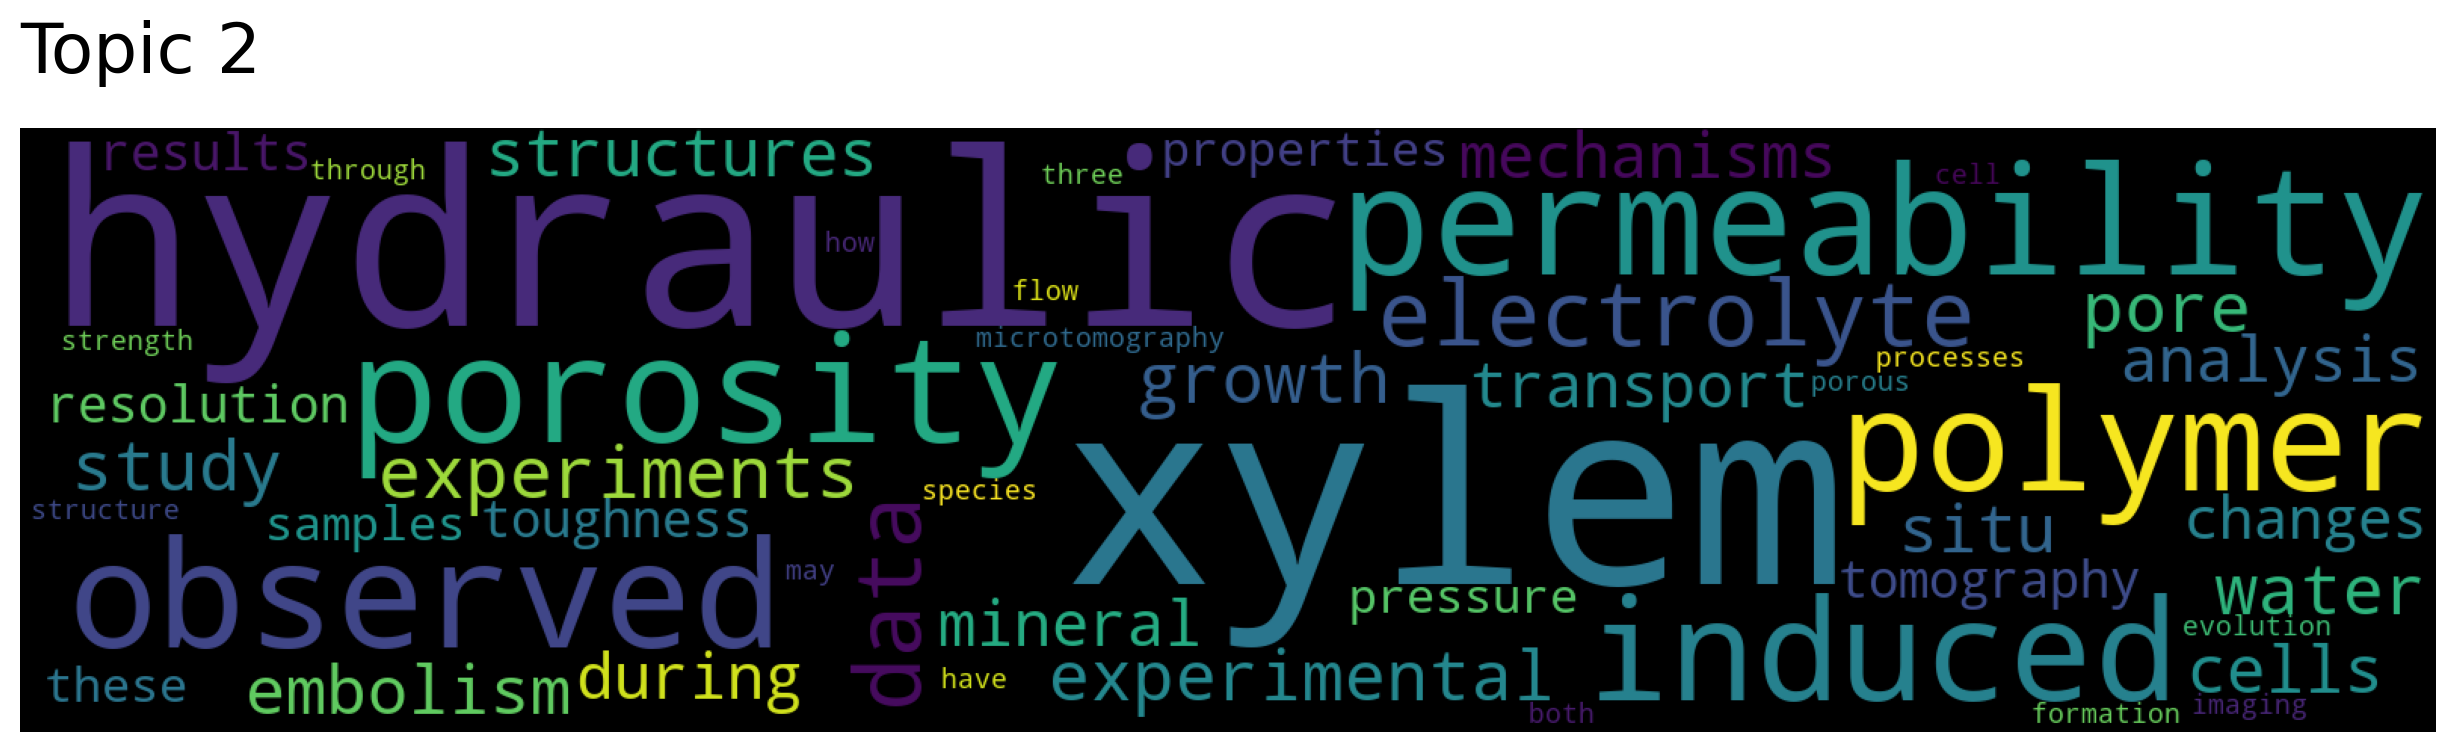

In [10]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:5]:
    model_reviews.generate_topic_wordcloud(topic)

In [13]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.6888359785079956
-----------
Pore-scale multiphase flow modeling and imaging of CO[d2] exsolution in Sandstone 
-----------

Document: 238, Score: 0.6654714345932007
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 370, Score: 0.6639209985733032
-----------
Pore-scale and topology analysis of flame stabilization inside inert porous media using X-ray microtomography 
-----------

Document: 302, Score: 0.6619054675102234
-----------
Micro-Scale Analysis of Liquid Water Breakthrough inside Gas Diffusion Layer for PEMFC Using X-ray Computed Tomography and Lattice Boltzmann Method 
-----------

Document: 275, Score: 0.661505937576294
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------



In [14]:
# search doc by keywords
documents, document_scores, document_ids = model_reviews.search_documents_by_keywords(keywords=["batteries"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

ValueError: ignored

In [15]:
words, word_scores = model_reviews.similar_words(keywords=["battery"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ValueError: ignored

In [12]:
# search doc by keywords
documents, document_scores, document_ids = model_reviews.search_documents_by_keywords(keywords=["tomography"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 241, Score: 0.3811495035233154
-----------
High temperature x-ray micro-tomography 
-----------

Document: 151, Score: 0.32256620527610713
-----------
Coded Aperture  Imaging  for  Fluorescent  X-rays-Biomedical Applications 
-----------

Document: 275, Score: 0.2983449081406013
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------

Document: 238, Score: 0.29227491349600854
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 437, Score: 0.27845156357515477
-----------
Scalable method for micro-CT analysis enables large scale quantitative characterization of brain lesions and implants Anatomic evaluation is an important aspect of many studies in neuroscience; however, it often lacks information about the three-dimensional structure of the brain. Micro-CT imaging provides an excellent, nondestructive, method for the evaluation of brain structure, but current applications to neurophysiologic

### BERTopic

In [16]:
!pip install bertopic

     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 636 kB 8.6 MB/s 
     |████████████████████████████████| 79 kB 4.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=5d729e3b105c7fcb3320ea737a2c73af2150a8b642e54da25901831d67b56e98
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [17]:
pip install bertopic[spacy]

     |████████████████████████████████| 6.0 MB 5.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 181 kB 48.4 MB/s 
     |████████████████████████████████| 653 kB 34.7 MB/s 
     |████████████████████████████████| 10.1 MB 32.1 MB/s 
     |████████████████████████████████| 451 kB 18.1 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [1]:
from bertopic import BERTopic

In [5]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(combined)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [6]:
topic_model.get_topic_info()

,Topic,Count,Name
0,0,143,0_the_of_and_in
1,1,64,1_bone_the_of_and
2,2,55,2_the_of_and_to
3,3,46,3_xylem_in_and_of
4,4,40,4_the_of_and_pumice
5,5,28,5_lithium_the_of_batteries
6,6,20,6_the_water_transport_and
7,-1,18,-1_ash_the_conversion_fuel
8,7,14,7_soil_of_water_the
9,8,12,8_the_oxidation_of_materials


In [7]:
topic_model.get_topic(0)

[('the', 0.054877471241708976),
 ('of', 0.050484629541976474),
 ('and', 0.04508880499133449),
 ('in', 0.039114185997918806),
 ('to', 0.03760625132801903),
 ('for', 0.03331138832299668),
 ('xray', 0.023116207642186134),
 ('with', 0.02306173037745924),
 ('is', 0.022591853902087764),
 ('that', 0.019962762775420754)]

In [8]:
topic_model.visualize_topics()


In [9]:
topic_model.visualize_barchart()

In [10]:
topic_model.visualize_heatmap()

### Using SciBERT

In [11]:
!pip install flair

  Using cached importlib_metadata-3.10.1-py3-none-any.whl (14 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [12]:
from flair.embeddings import TransformerDocumentEmbeddings

scibert_emb = TransformerDocumentEmbeddings('allenai/scibert_scivocab_uncased')
topic_model_scibert = BERTopic(embedding_model=scibert_emb)

2022-03-17 09:17:08,955 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


In [13]:
start_time = time.time()
topics_scibert, probs_scibert = topic_model_scibert.fit_transform(combined)
print('Total time taken (mins): ', int((time.time()-start_time)/60))


In [14]:
topic_model.visualize_topics()

In [15]:
topic_model.visualize_barchart()